# Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

2024-04-09 16:11:18.454757: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 16:11:18.454871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 16:11:18.611906: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Resize Images
The images in data should should be resized to mentioned width and height as now we are proceeding to use another model. 

In [2]:
# Set image size
SIZE = 224

# Training Dataset

In [3]:
# Loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/signature-verification-dataset/sign_data/train/',
    image_size=(224, 224)
)

Found 1649 files belonging to 128 classes.


# Testing Dataset

In [4]:
# Loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/signature-verification-dataset/sign_data/test/',
    seed=42,
    image_size=(224, 224)
)

Found 500 files belonging to 42 classes.


# Training Images
We have following images in training data.

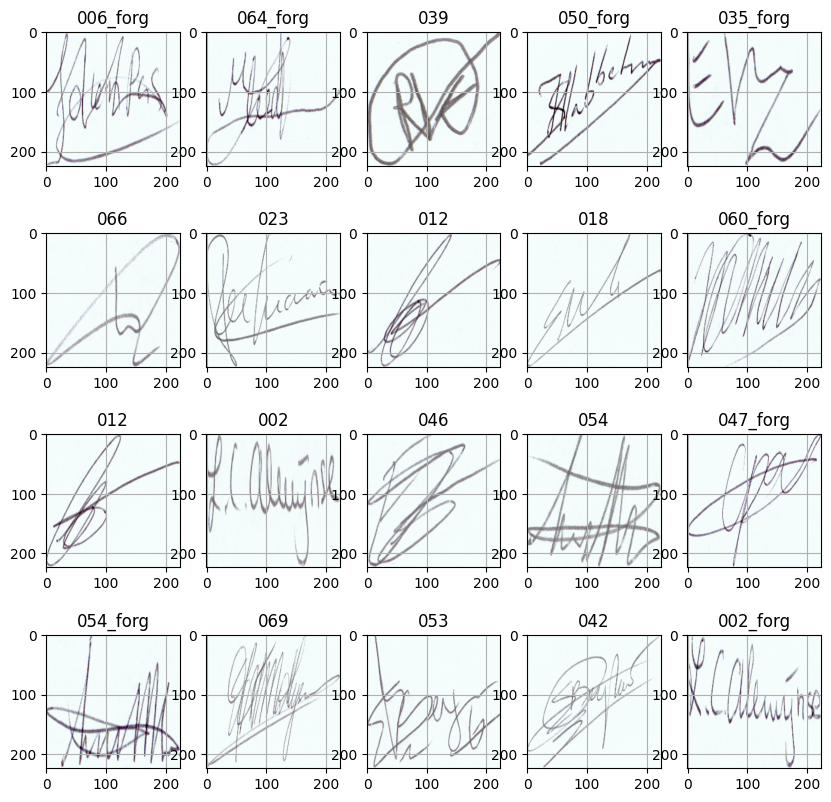

In [5]:
# Extract class names from training dataset
class_names = training_ds.class_names

# Display sample images from training dataset
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(images[i])
        plt.title(class_names[labels[i]])
        plt.grid(True)

# Testing Images
These are the images in testing data.

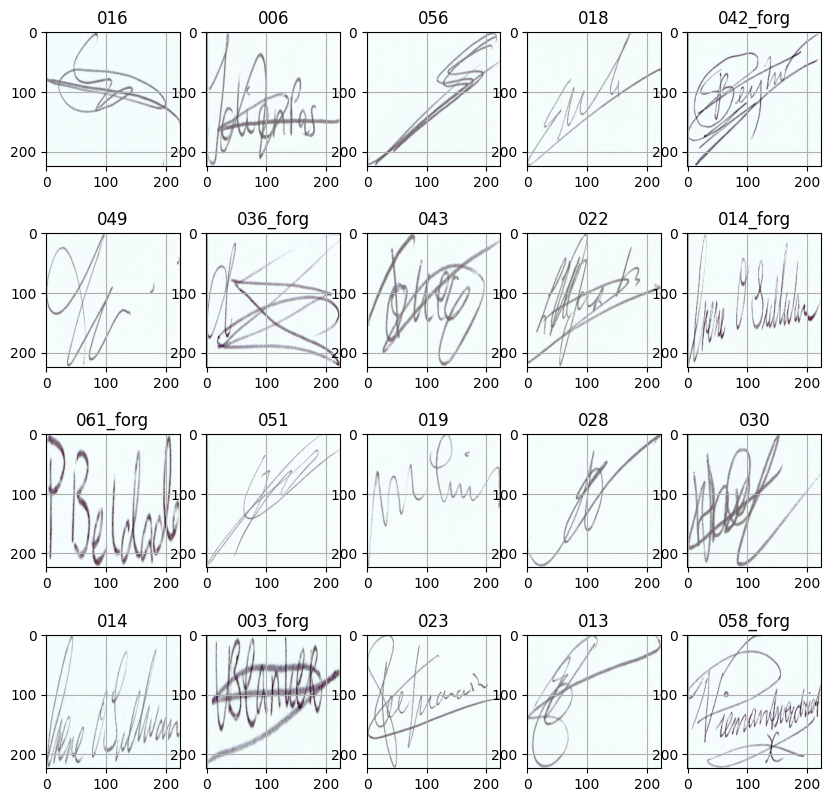

In [6]:
# Extract class names from testing dataset
class_names = training_ds.class_names

# Display sample images from testing dataset
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(images[i])
        plt.title(class_names[labels[i]])
        plt.grid(True)

# Data Preprocessing
Saving the image data in numpy array

In [7]:
# Import necessary libraries for data preprocessing
import cv2
import os
import glob

# Initialize lists to store training data and labels
train_data = []
train_labels = []

# Load training data and labels
for per in os.listdir('/kaggle/input/signature-verification-dataset/sign_data/train/'):
    for data in glob.glob('/kaggle/input/signature-verification-dataset/sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))
train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

# Initialize lists to store test data and labels
test_data = []
test_labels = []

# Load test data and label
for per in os.listdir('/kaggle/input/signature-verification-dataset/sign_data/test/'):
    for data in glob.glob('/kaggle/input/signature-verification-dataset/sign_data/test/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))
test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

# Check for Imbalance

In [8]:
# Check for imbalance in training data
num_classes = 2
num_samples_per_class = [np.sum(train_labels == i) for i in range(num_classes)]
print("Number of samples per class in the training data:")
for i in range(num_classes):
    print(f"Class {i}: {num_samples_per_class[i]}")

Number of samples per class in the training data:
Class 0: 887
Class 1: 762


In [9]:
from imblearn.over_sampling import SMOTE

# Flatten train_data
train_data_flat = np.reshape(train_data, (train_data.shape[0], -1))

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
train_data_resampled, train_labels_resampled = smote.fit_resample(train_data_flat, train_labels)

# Reshape train_data_resampled back to the original shape
train_data_resampled = np.reshape(train_data_resampled, (train_data_resampled.shape[0], 224, 224, 3))

# Configure data for Categorical Entropy Loss
For use of categorical entropy loss we need to configure data. 

In [10]:
# Convert train_labels_resampled to categorical
from keras.utils import to_categorical
train_labels_resampled = to_categorical(train_labels_resampled)

# Shapes of Numpy Array

In [11]:
train_data_resampled.shape

(1774, 224, 224, 3)

In [12]:
train_data_resampled = train_data_resampled.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [13]:
train_data_resampled.shape

(1774, 224, 224, 3)

In [14]:
train_labels_resampled.shape

(1774, 2)

# Shuffling
Shuffling is needed in order to break any artificially imposed ordering in the (non-timeseries) data which may harm the learning process, and it always leads to more reliable performance estimates.

In [15]:
# Shuffle the data
from sklearn.utils import shuffle
train_data_resampled,train_labels_resampled = shuffle(train_data_resampled,train_labels_resampled)
test_data,test_labels = shuffle(test_data,test_labels)

# Importing base model (VGG-16)

In [16]:
# Import VGG-16 as base model
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Our Model
Here we are freezing first 5 layers og VGG-16 and adding top layers.

In [17]:
# Freeze first 5 layers of VGG-16
i=0
while i != 5:
    base_model.layers[i].trainable = False
    i+=1

# Add custom classification layers
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(2, activation='softmax'))

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 2)              │     6,423,298 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 21,025,410 (80.21 MB)

 Non-trainable params: 112,576 (439.75 KB)

# Training

In [18]:
# Train the model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]

progress = model.fit(train_data_resampled, train_labels_resampled, 
                    batch_size=30,
                    epochs=100,
                    callbacks=early_stop,
                    validation_split=0.3)

Epoch 1/100


I0000 00:00:1712679192.985044     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712679193.007855     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.4975 - loss: 0.9132

W0000 00:00:1712679227.777313     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712679229.651931     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.4981 - loss: 0.9098 - val_accuracy: 0.5704 - val_loss: 0.6635
Epoch 2/100


W0000 00:00:1712679254.091772     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.5812 - loss: 0.6649 - val_accuracy: 0.6098 - val_loss: 0.6436
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.6739 - loss: 0.6010 - val_accuracy: 0.6773 - val_loss: 0.6384
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.7456 - loss: 0.5181 - val_accuracy: 0.9081 - val_loss: 0.2413
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.8961 - loss: 0.2776 - val_accuracy: 0.9118 - val_loss: 0.1993
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.9362 - loss: 0.1419 - val_accuracy: 0.9306 - val_loss: 0.1695
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.9572 - loss: 0.1224 - val_accuracy: 0.9062 - val_loss: 0.3097
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.9537 - loss: 0.1073 - val_accuracy: 0.9869 - val_loss: 0.0465
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 318ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy

# Save the Model

In [19]:
# Save the trained model
model.save('Signature_verification_system_using_vgg16.keras')

# Plotting the Accuracy

<Figure size 640x480 with 0 Axes>

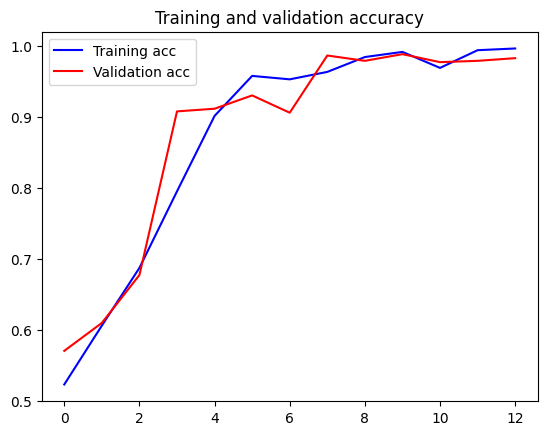

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot training and validation accuracy
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

# Plotting the Loss

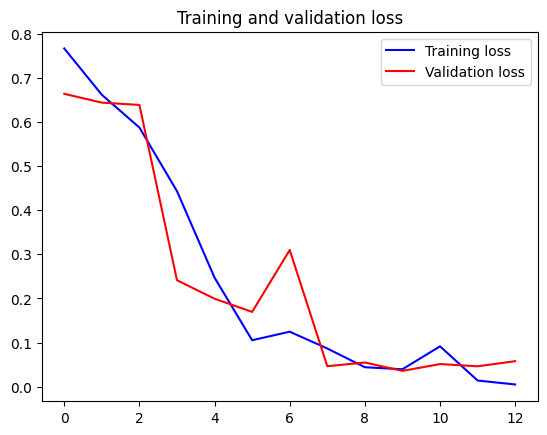

In [21]:
# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Accuracy and Classification Report

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Predict on test data
pred = model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(pred, axis=1), test_labels)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the model
y_pred_classes = np.argmax(pred, axis=1)
y_true = test_labels


# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:")
print(class_report)

# Calculate additional evaluation metrics: precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print additional evaluation metrics
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

 2/16 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step

W0000 00:00:1712679446.328559     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step 
Accuracy: 0.99
Confusion Matrix:
[[247   5]
 [  0 248]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       252
           1       0.98      1.00      0.99       248

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500


Precision: 0.99
Recall: 0.99
F1-score: 0.99


W0000 00:00:1712679468.161475     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Plotting ROC Curve

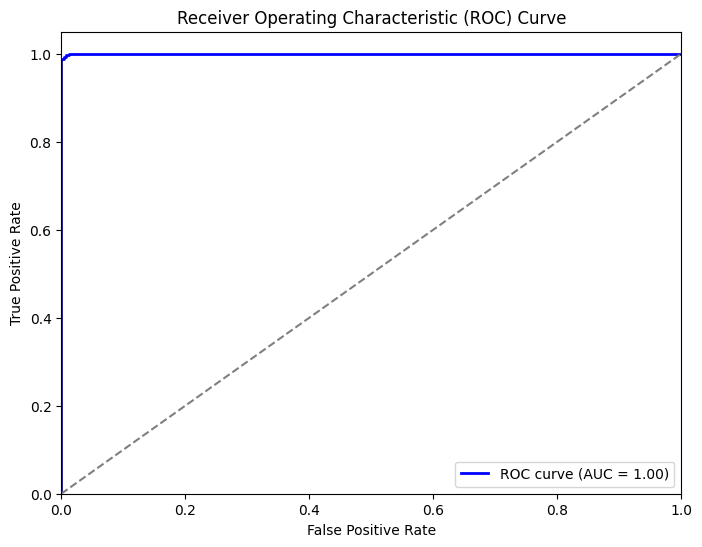

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, pred[:, 1])

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_true, pred[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predict on Test data

In [24]:
import numpy as np
import cv2
from keras.models import load_model

# Load the trained model
model = load_model('Signature_verification_system_using_vgg16.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    return img.reshape(-1, 224, 224, 3)

# Load two images from the test dataset
image_path_verified = '/kaggle/input/signature-verification-dataset/sign_data/test/049/01_049.png'
image_path_fraud = '/kaggle/input/signature-verification-dataset/sign_data/test/049_forg/01_0114049.PNG'

# Preprocess the images
verified_image = preprocess_image(image_path_verified)
fraud_image = preprocess_image(image_path_fraud)

# Predictions
prediction_verified = model.predict(verified_image)
prediction_fraud = model.predict(fraud_image)

# Determine prediction for the second image
if prediction_fraud[0][1] > prediction_verified[0][1]:
    print("Second image is predicted as FRAUD.")
else:
    print("Second image is predicted as VERIFIED.")


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 62 variables whereas the saved optimizer has 50 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Second image is predicted as FRAUD.
